In [191]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

#Data cleaning

In [192]:
#detect the face and eyes and crop that image and store

In [193]:
img=cv2.imread("C:\\Users\\HP\\Downloads\\ElonMusk.jpg")

In [194]:
img.shape

(1590, 1200, 3)

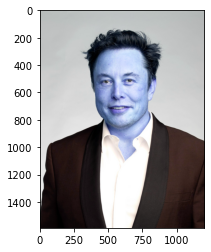

In [195]:
plt.imshow(img)

In [196]:
gray= cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(1590, 1200)

In [197]:
gray

array([[190, 189, 189, ..., 182, 182, 182],
       [189, 189, 189, ..., 182, 182, 182],
       [189, 189, 189, ..., 182, 182, 182],
       ...,
       [ 10,  10,  11, ...,  26,  26,  27],
       [ 10,  11,  11, ...,  25,  25,  25],
       [ 10,  11,  11, ...,  24,  23,  23]], dtype=uint8)

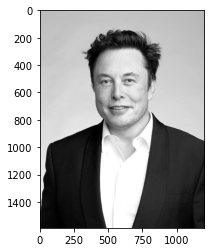

In [198]:
plt.imshow(gray, cmap='gray')

In [199]:
#how to detect face and eyes of any image so that we can crop those images

In [200]:
face_cascade = cv2.CascadeClassifier("C:\\Users\\HP\\Downloads\\haarcascade_frontalface_default.xml")
eye_cascade = cv2.CascadeClassifier("C:\\Users\\HP\\Downloads\\haarcascade_eye.xml")
faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces

array([[328, 317, 494, 494]])

In [201]:
(x,y,w,h)= faces[0]
x,y,w,h

(328, 317, 494, 494)

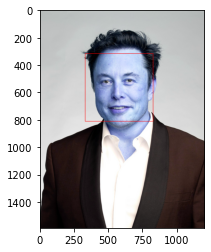

In [202]:
face_img= cv2.rectangle(img, (x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

In [203]:
cv2.destroyAllWindows()

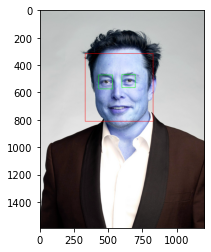

In [204]:
for(x,y,w,h) in faces:
  face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
  roi_gray = gray[y:y+h,x:x+w]
  roi_color = face_img[y:y+h,x:x+w]
  eyes = eye_cascade.detectMultiScale(roi_gray)
  for(ex,ey,ew,eh) in eyes:
    cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

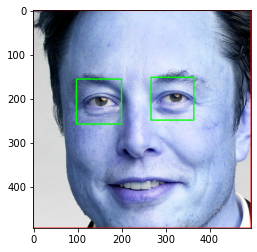

In [205]:
cropped_img = np.array(roi_color)
cropped_img.shape
plt.imshow(roi_color)


In [206]:
#wavelet transform
import numpy as np
import pywt
import cv2 

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #Convert to grayscale
    imArray = cv2.cvtColor(imArray, cv2.COLOR_RGB2GRAY)
    #convert to float
    imArray = np.float32(imArray)
    imArray /= 255;
    #compute coefficients
    coeffs = pywt.wavedec2(imArray, mode, level=level)
    #process coefficients
    coeffs_H = list(coeffs)
    coeffs_H[0] *=0;

    #reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H = np.uint8(imArray_H)

    return imArray_H

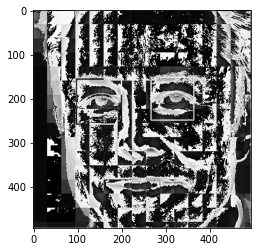

In [207]:
im_har = w2d(cropped_img,'db1',5)
plt.imshow(im_har, cmap='gray')

In [243]:
def get_cropped_image_if_2_eyes(img_path):
    img=cv2.imread(img_path)
    if(img is not None):
        gray=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
        faces=face_cascade.detectMultiScale(gray,1.3,5)
        for(x,y,w,h) in faces:
            roi_gray=gray[y:y+h, x:x+w]
            roi_color=img[y:y+h, x:x+w]
            eyes=eye_cascade.detectMultiScale(roi_gray)
            if len(eyes) >=2:
                return roi_color

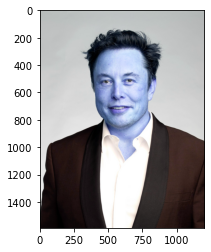

In [244]:
original_img=cv2.imread("C:\\Users\\HP\\Downloads\\ElonMusk.jpg")
plt.imshow(original_img)

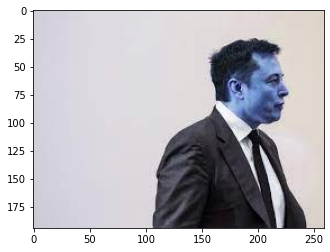

In [245]:
cropped_img=cv2.imread("C:\\Users\\HP\\Downloads\\sideElon.jpg")
plt.imshow(cropped_img)

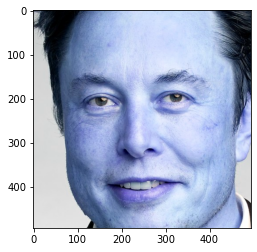

In [246]:
cropped_img_no_2_eyes=get_cropped_image_if_2_eyes("C:/Users/HP/Downloads/ElonMusk.jpg")
cropped_img_no_2_eyes
plt.imshow(cropped_img_no_2_eyes)

In [247]:
path_to_data = 'C:/Users/HP/OneDrive/Desktop/dataset/'
path_to_cr_data= 'C:/Users/HP/OneDrive/Desktop/dataset/cropped/'

In [248]:
import os
img_dirs=[]

for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)
    #if entry.is_dir():
    #    img_dirs.append(entry.path)
'''path= path_to_data
dir_list=os.listdir(path)
print(dir_list)'''


'path= path_to_data\ndir_list=os.listdir(path)\nprint(dir_list)'

In [249]:
img_dirs

['C:/Users/HP/OneDrive/Desktop/dataset/cropped',
 'C:/Users/HP/OneDrive/Desktop/dataset/jeff_bezoz',
 'C:/Users/HP/OneDrive/Desktop/dataset/lionel_messi',
 'C:/Users/HP/OneDrive/Desktop/dataset/maria_sharapova',
 'C:/Users/HP/OneDrive/Desktop/dataset/roger_federer']

In [250]:
import shutil
if os.path.exists(path_to_cr_data):
    shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data )

In [251]:
cropped_img_dirs=[]
celebrity_file_name_dict = {}
for img_dir in img_dirs:
    count=1
    celebrity_name=img_dir.split('/')[-1]
    celebrity_file_name_dict[celebrity_name]=[]
    for entry in os.scandir(img_dir):
        roi_color=get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_img_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ", cropped_folder)
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name
            cv2.imwrite(cropped_file_path,roi_color)
            celebrity_file_name_dict[celebrity_name].append(cropped_file_path)
            count+=1

Generating cropped images in folder:  C:/Users/HP/OneDrive/Desktop/dataset/cropped/jeff_bezoz
Generating cropped images in folder:  C:/Users/HP/OneDrive/Desktop/dataset/cropped/lionel_messi
Generating cropped images in folder:  C:/Users/HP/OneDrive/Desktop/dataset/cropped/maria_sharapova
Generating cropped images in folder:  C:/Users/HP/OneDrive/Desktop/dataset/cropped/roger_federer


In [253]:
celebrity_file_names_dict={}
for img_dir in cropped_img_dirs:
    celebrity_name = img_dir.split('/')[-1]
    file_list=[]
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    celebrity_file_names_dict[celebrity_name]= file_list
celebrity_file_names_dict

{'jeff_bezoz': ['C:/Users/HP/OneDrive/Desktop/dataset/cropped/jeff_bezoz\\jeff_bezoz1.png',
  'C:/Users/HP/OneDrive/Desktop/dataset/cropped/jeff_bezoz\\jeff_bezoz2.png'],
 'lionel_messi': ['C:/Users/HP/OneDrive/Desktop/dataset/cropped/lionel_messi\\lionel_messi1.png',
  'C:/Users/HP/OneDrive/Desktop/dataset/cropped/lionel_messi\\lionel_messi2.png',
  'C:/Users/HP/OneDrive/Desktop/dataset/cropped/lionel_messi\\lionel_messi3.png',
  'C:/Users/HP/OneDrive/Desktop/dataset/cropped/lionel_messi\\lionel_messi4.png'],
 'maria_sharapova': ['C:/Users/HP/OneDrive/Desktop/dataset/cropped/maria_sharapova\\maria_sharapova1.png',
  'C:/Users/HP/OneDrive/Desktop/dataset/cropped/maria_sharapova\\maria_sharapova2.png'],
 'roger_federer': ['C:/Users/HP/OneDrive/Desktop/dataset/cropped/roger_federer\\roger_federer1.png']}

In [254]:
class_dict = {}
count =0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name]=count
    count=count+1
class_dict


{'jeff_bezoz': 0, 'lionel_messi': 1, 'maria_sharapova': 2, 'roger_federer': 3}

In [260]:
X,y=[],[]
for celebrity_name,training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        scalled_raw_img=cv2.resize(img,(32,32))
        img_har= w2d(img,'db1',5)
        scalled_img_har = cv2.resize(img_har,(32,32))
        combined_img=np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[celebrity_name])

In [261]:
X=np.array(X).reshape(len(X),4096).astype(float)
X.shape

(9, 4096)

In [262]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [265]:
X_train,X_test,y_train, y_test = train_test_split(X,y,random_state=0)

pipe = Pipeline([('scaler',StandardScaler()), ('svc',SVC(kernel = 'rbf', C=10))])
pipe.fit(X_train,y_train)
pipe.score(X_test,y_test)


0.3333333333333333

In [266]:
print(classification_report(y_test,pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.33      1.00      0.50         1
           2       0.00      0.00      0.00         1

    accuracy                           0.33         3
   macro avg       0.11      0.33      0.17         3
weighted avg       0.11      0.33      0.17         3



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
